In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Lai-offer/"

'Advanced Sorting and Practice.ipynb'
 bank.data.csv
'BA project1.ipynb'
'Binary Tree.ipynb'
'Class 25 python Practice.ipynb'
'Class 42 Python - Probability, Sampling and Randomization.ipynb'
'Classic Binary Search.ipynb'
'Copy of Lof_SQL_classes_environment.ipynb'
'Copy of Supervised Learning Project.ipynb'
'Copy of Unsupervised Learning Project.ipynb'
'Data Manipulation in Python II.ipynb'
'Data Manipulation in Python I.ipynb'
'Linklist practice.ipynb'
'Python Hashtable.ipynb'
'Queue and Stack.ipynb'
 TVdata.txt
 uk_rain_2014.csv
 Untitled0.ipynb
 watch_reviews.tsv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lai-offer/TVdata.txt') 

In [ ]:
df

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,160848,9.726396,3,32,other,2010,"Comedy,Drama",14,0,0,7.8,4.311600,0,no award,NotRated,1.700000
4222,365178,7.912698,29,35,other,2013,Music,0,0,0,0.0,4.878900,0,no award,PG-13,0.000000
4223,11615,2.935691,3,27,other,2008,Comedy,505,0,0,7.1,110.350000,0,other award,NotRated,0.000000
4224,26365,2.866614,4,15,other,2003,Documentary,5,100000,0,6.0,79.633333,0,no award,NotRated,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
df.isnull().sum()

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64

In [ ]:
df_categorical = df.select_dtypes(include = 'object')

In [ ]:
df_categorical

,import_id,genres,awards,mpaa
0,lionsgate,"Action,Thriller,Drama",other award,PG-13
1,lionsgate,"Comedy,Crime,Thriller",no award,R
2,other,"Crime,Drama",other award,R
3,lionsgate,"Thriller,Drama,War,Documentary,Mystery,Action",Oscar,R
4,lionsgate,"Crime,Thriller,Mystery,Documentary",other award,R
...,...,...,...,...
4221,other,"Comedy,Drama",no award,NotRated
4222,other,Music,no award,PG-13
4223,other,Comedy,other award,NotRated
4224,other,Documentary,no award,NotRated


In [ ]:
df_categorical['import_id'].value_counts()

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64

In [ ]:
df_categorical['genres'].value_counts()

Documentary                          269
Comedy                               265
Drama                                253
Horror                               149
Drama,Romance                         81
                                    ... 
Drama,Sci-Fi,Comedy,Romance            1
Action,Drama,Crime,Mystery,Comedy      1
Thriller,Action,Sci-Fi                 1
Documentary,Music,Drama                1
Horror,Action,Comedy                   1
Name: genres, Length: 1165, dtype: int64

In [ ]:
df_categorical['awards'].value_counts()

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64

In [ ]:
df_categorical['mpaa'].value_counts()

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64

In [ ]:
df_genres = df_categorical['genres']

In [ ]:
genres_split = [x.split(',') for x in df_genres]

In [ ]:
def get_total_count(list_genre):
  genre_dict = {}
  for i in list_genre:
    for j in i:
      if j in genre_dict:
        genre_dict[j] += 1
      else:
        genre_dict[j] = 1
  return genre_dict

In [ ]:
genre_dict = get_total_count(genres_split)

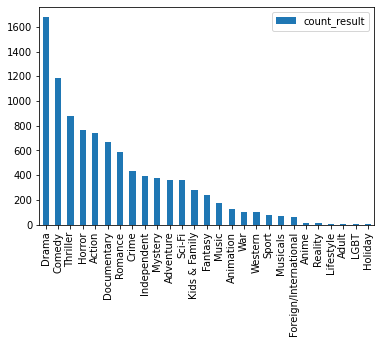

In [ ]:
pd.DataFrame.from_dict(genre_dict, orient = 'index', columns = ['count_result']).sort_values('count_result', ascending = False).plot(kind= 'bar')

In [ ]:
genre_dict.keys()

dict_keys(['Action', 'Thriller', 'Drama', 'Comedy', 'Crime', 'War', 'Documentary', 'Mystery', 'Adventure', 'Western', 'Sci-Fi', 'Fantasy', 'Horror', 'Sport', 'Kids & Family', 'Animation', 'Romance', 'Music', 'Independent', 'Musicals', 'Foreign/International', 'Lifestyle', 'Anime', 'Holiday', 'LGBT', 'Reality', 'Adult'])

In [ ]:
len(genre_dict.keys())

27

In [ ]:
select_genre = set(genre_dict.keys())

In [ ]:
dictionary = dict.fromkeys(select_genre, 0)

In [ ]:
dictionary

{'Action': 0,
 'Adult': 0,
 'Adventure': 0,
 'Animation': 0,
 'Anime': 0,
 'Comedy': 0,
 'Crime': 0,
 'Documentary': 0,
 'Drama': 0,
 'Fantasy': 0,
 'Foreign/International': 0,
 'Holiday': 0,
 'Horror': 0,
 'Independent': 0,
 'Kids & Family': 0,
 'LGBT': 0,
 'Lifestyle': 0,
 'Music': 0,
 'Musicals': 0,
 'Mystery': 0,
 'Reality': 0,
 'Romance': 0,
 'Sci-Fi': 0,
 'Sport': 0,
 'Thriller': 0,
 'War': 0,
 'Western': 0}

In [ ]:
def get_video_genre_count(genres_split:'list', genre_dict):
  video_genre_count = []
  for i in genres_split:
    select_genre = dict.fromkeys(set(genre_dict.keys()), 0)
    for j in i:
      if j in select_genre:
        select_genre[j] += 1
    video_genre_count.append(select_genre)
  return video_genre_count

In [ ]:
selected_genre_appearance = get_video_genre_count(genres_split, genre_dict)

In [ ]:
genre_df =pd.DataFrame.from_dict(selected_genre_appearance)

In [ ]:
df = pd.concat([df, genre_df], axis = 1)

In [ ]:
df = df.drop('genres', axis = 1)

In [ ]:
df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category,Musicals,Western,Crime,Foreign/International,Documentary,Adventure,Reality,Lifestyle,LGBT,Horror,War,Thriller,Action,Drama,Fantasy,Sport,Kids & Family,Animation,Romance,Comedy,Independent,Mystery,Adult,Sci-Fi,Holiday,Anime,Music
0,385504,307127.605608,1,3,lionsgate,2013,69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300175,270338.426375,1,3,lionsgate,2013,46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,361899,256165.867446,1,3,other,2012,197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,308314,196622.720996,3,4,lionsgate,2008,356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,1,3,lionsgate,2013,46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


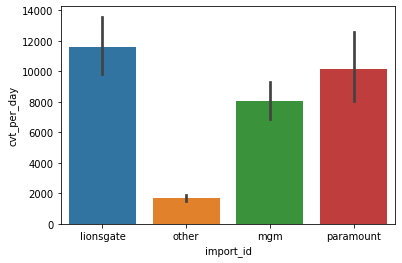

In [ ]:
sns.barplot(data = df, x = 'import_id', y = 'cvt_per_day')

lionsgate performs better on cvt_per_day compare to other import_id

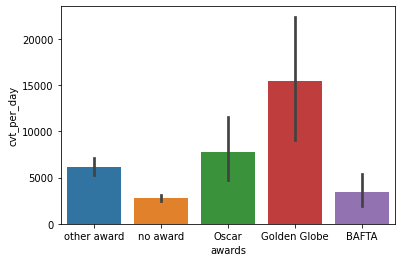

In [ ]:
sns.barplot(data = df, x = 'awards', y = 'cvt_per_day')

the video, which gets golden globe awards, performs better on cvt_per_day compare to other awards

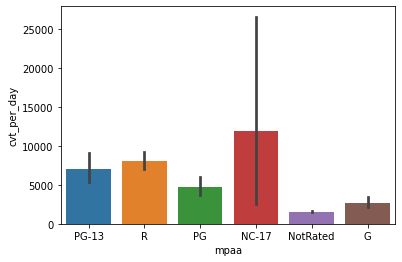

In [ ]:
sns.barplot(data = df, x = 'mpaa',  y= 'cvt_per_day')

In [ ]:
df.columns

Index(['video_id', 'cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'import_id', 'release_year',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',
       'metacritic_score', 'awards', 'mpaa', 'star_category', 'Musicals',
       'Western', 'Crime', 'Foreign/International', 'Documentary', 'Adventure',
       'Reality', 'Lifestyle', 'LGBT', 'Horror', 'War', 'Thriller', 'Action',
       'Drama', 'Fantasy', 'Sport', 'Kids & Family', 'Animation', 'Romance',
       'Comedy', 'Independent', 'Mystery', 'Adult', 'Sci-Fi', 'Holiday',
       'Anime', 'Music'],
      dtype='object')

In [ ]:
df_genres = df[['Thriller',
       'Anime', 'Holiday', 'Crime', 'Music', 'Adventure', 'Reality', 'Romance',
       'Action', 'Comedy', 'Documentary', 'Horror', 'Drama', 'Musicals',
       'Foreign/International', 'Lifestyle', 'Western', 'Fantasy', 'Sport',
       'Mystery', 'Sci-Fi', 'Adult', 'LGBT', 'Animation', 'Kids & Family',
       'War', 'Independent', 'cvt_per_day']]

In [ ]:
df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category,Musicals,Western,Crime,Foreign/International,Documentary,Adventure,Reality,Lifestyle,LGBT,Horror,War,Thriller,Action,Drama,Fantasy,Sport,Kids & Family,Animation,Romance,Comedy,Independent,Mystery,Adult,Sci-Fi,Holiday,Anime,Music
0,385504,307127.605608,1,3,lionsgate,2013,69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300175,270338.426375,1,3,lionsgate,2013,46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,361899,256165.867446,1,3,other,2012,197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,308314,196622.720996,3,4,lionsgate,2008,356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,1,3,lionsgate,2013,46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


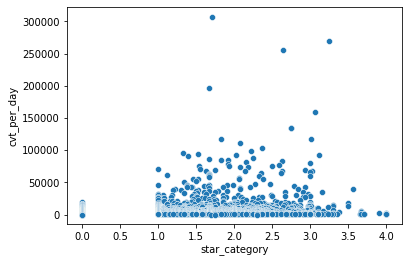

In [ ]:
sns.scatterplot(data =df, x = 'star_category', y = 'cvt_per_day')

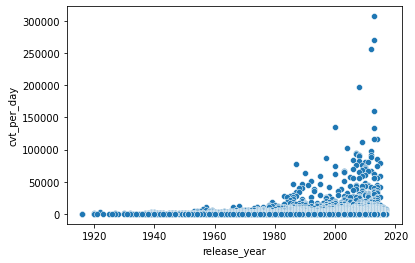

In [ ]:
sns.scatterplot(data = df, x = 'release_year', y = 'cvt_per_day')

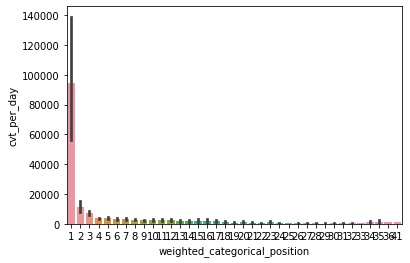

In [ ]:
sns.barplot(data = df, x = 'weighted_categorical_position', y = 'cvt_per_day')

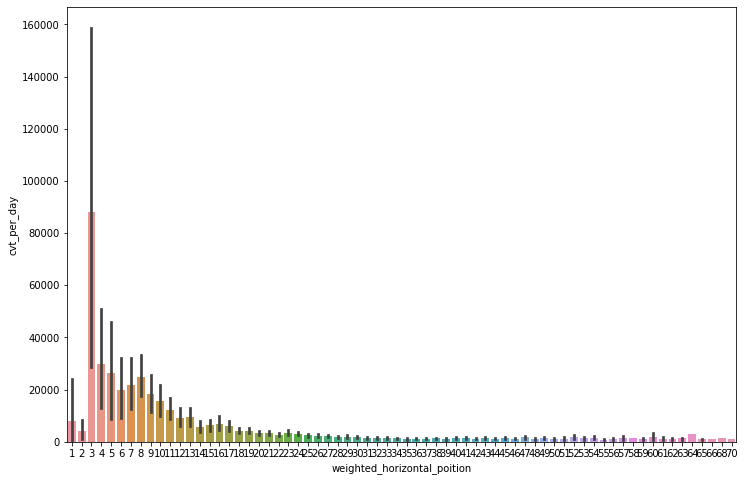

In [ ]:
plt.figure(figsize= (12, 8))
sns.barplot(data = df, x = 'weighted_horizontal_poition', y = 'cvt_per_day')

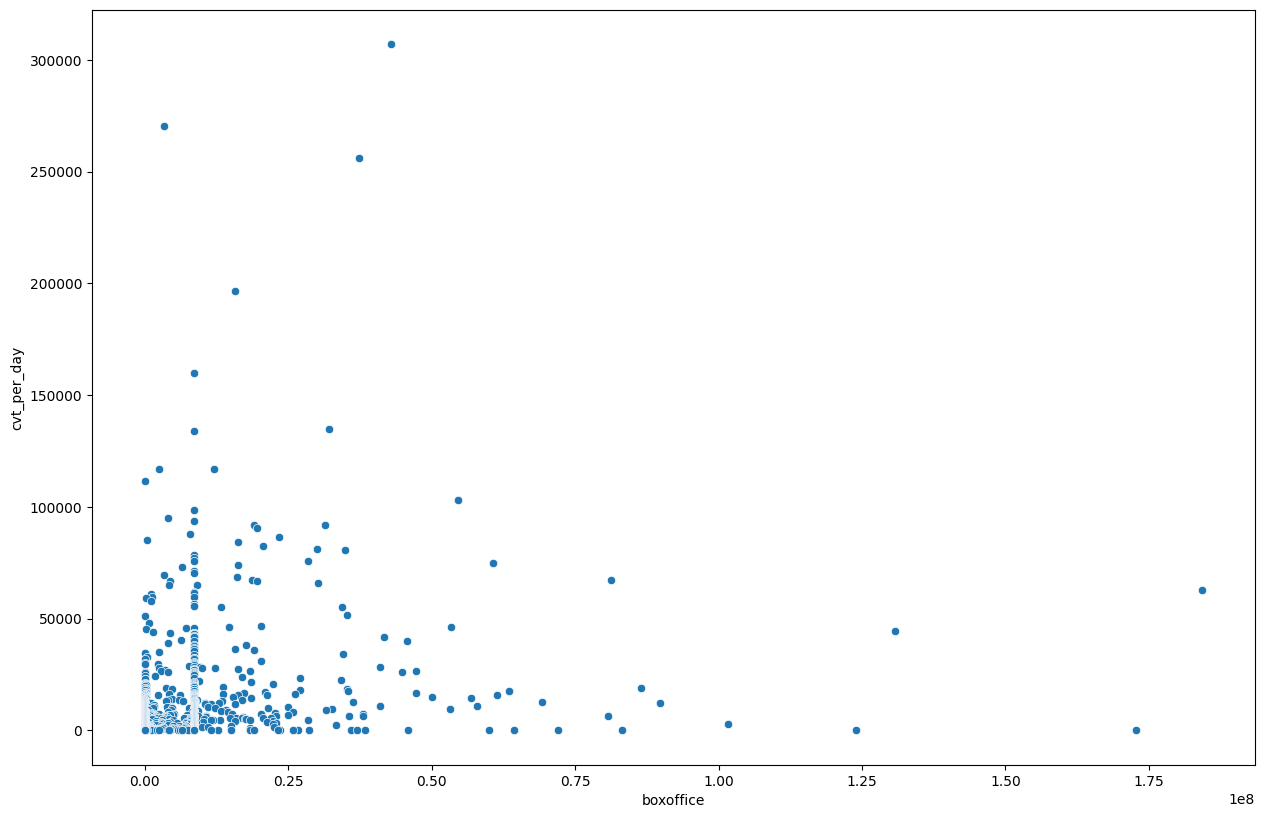

In [ ]:
plt.figure(figsize = (15, 10), dpi = 100)
sns.scatterplot(data = df, x = 'boxoffice', y = 'cvt_per_day', )

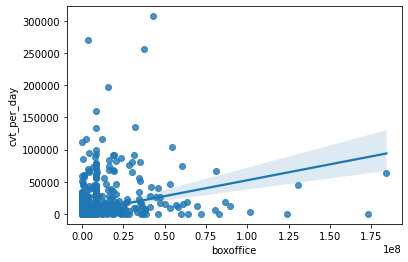

In [ ]:
sns.regplot(data = df, x = 'boxoffice', y = 'cvt_per_day')

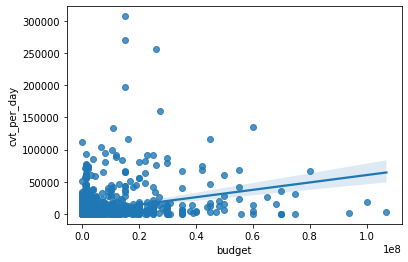

In [ ]:
sns.regplot(data = df, x = 'budget', y = 'cvt_per_day')

# Data Preprocessing

In [ ]:
df_final = pd.get_dummies(data = df)

In [ ]:
df_final

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,Musicals,Western,Crime,Foreign/International,Documentary,Adventure,Reality,Lifestyle,LGBT,Horror,War,Thriller,Action,Drama,Fantasy,Sport,Kids & Family,Animation,Romance,Comedy,Independent,Mystery,Adult,Sci-Fi,Holiday,Anime,Music,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R
0,385504,307127.605608,1,3,2013,69614,15000000,42930462,6.5,112.301017,51,1.710000,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,300175,270338.426375,1,3,2013,46705,15000000,3301046,6.5,94.983250,41,3.250000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,361899,256165.867446,1,3,2012,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,308314,196622.720996,3,4,2008,356339,15000000,15700000,7.6,130.703583,94,1.666667,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,307201,159841.652064,1,3,2013,46720,27220000,8551228,6.4,105.545533,37,3.066667,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,160848,9.726396,3,32,2010,14,0,0,7.8,4.311600,0,1.700000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4222,365178,7.912698,29,35,2013,0,0,0,0.0,4.878900,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4223,11615,2.935691,3,27,2008,505,0,0,7.1,110.350000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4224,26365,2.866614,4,15,2003,5,100000,0,6.0,79.633333,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


1. filter the duration in mins
1 case : > 100 mins
2 case : 100- 50
3 case : < 50

2. second filter budget
1 case: > 10 million
2 case: 1-10 million
3 case: < 1 million

In [ ]:
a = df_final['release_year'].min()

In [ ]:
df_final['year_to_first'] = df_final['release_year'] - a

In [ ]:
df_final.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,Musicals,Western,Crime,Foreign/International,Documentary,Adventure,Reality,Lifestyle,LGBT,Horror,War,Thriller,Action,Drama,Fantasy,Sport,Kids & Family,Animation,Romance,Comedy,Independent,Mystery,Adult,Sci-Fi,Holiday,Anime,Music,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,year_to_first
0,385504,307127.605608,1,3,2013,69614,15000000,42930462,6.5,112.301017,51,1.710000,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,97
1,300175,270338.426375,1,3,2013,46705,15000000,3301046,6.5,94.983250,41,3.250000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,97
2,361899,256165.867446,1,3,2012,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,96
3,308314,196622.720996,3,4,2008,356339,15000000,15700000,7.6,130.703583,94,1.666667,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,92
4,307201,159841.652064,1,3,2013,46720,27220000,8551228,6.4,105.545533,37,3.066667,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,97


In [ ]:
X = df_final.drop(columns = ['video_id', 'cvt_per_day', 'release_year'], axis = 1)

In [ ]:
y = df_final['cvt_per_day']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
len(X.columns)

52

# Randomforest model

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_features': [8, 25, 30],
              'max_depth': [10, 12, 15],
              'bootstrap': [True]
}

In [ ]:
RF_model = RandomForestRegressor()
grid = GridSearchCV(RF_model, param_grid= param_grid)

In [ ]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 12, 15],
                         'max_features': [8, 25, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
def print_GridSearch_result(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
print_GridSearch_result(grid)

Best score: 0.4653787685335649
Best parameters set:
bootstrap:True
max_depth:15
max_features:25
n_estimators:300


In [ ]:
y_pred = grid.predict(scaled_X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7743.374923579308

In [ ]:
RF_model_final = RandomForestRegressor(max_depth = 15, n_estimators= 300, max_features= 25)
RF_model_final.fit(X, y)

RandomForestRegressor(max_depth=15, max_features=25, n_estimators=300)

In [ ]:
pd.DataFrame(data = RF_model_final.feature_importances_, index = X.columns).sort_values(by = 0, ascending = False)

,0
weighted_categorical_position,2.288236e-01
imdb_votes,1.442065e-01
weighted_horizontal_poition,1.416519e-01
year_to_first,8.587574e-02
import_id_lionsgate,5.818385e-02
boxoffice,5.509151e-02
budget,4.010240e-02
star_category,3.816490e-02
metacritic_score,3.731048e-02
duration_in_mins,3.316852e-02


# ElasticNet

In [ ]:
param_grid = {'alpha': [0.1, 0.5 ,1, 10],
              'l1_ratio': [0.3, 0.4, 0.6, 0.8],
              'max_iter': [10000]}

In [ ]:
Elastic_model = ElasticNet()
ela_grid = GridSearchCV(Elastic_model, param_grid= param_grid)

In [ ]:
ela_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 10],
                         'l1_ratio': [0.3, 0.4, 0.6, 0.8],
                         'max_iter': [10000]})

In [ ]:
print_GridSearch_result(ela_grid)

Best score: 0.22587380416260236
Best parameters set:
alpha:1
l1_ratio:0.3
max_iter:10000


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = ela_grid.predict(scaled_X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

12524.79821735782

# Super Vector Machine(SVM)

In [ ]:
param_grid = {'C': [0.1, 0.5, 1, 10, 50],
              'kernel': ['poly', 'linear'],
              'max_iter': [10000]}

In [ ]:
svm_model = SVR()

In [ ]:
svm_grid = GridSearchCV(svm_model, param_grid= param_grid)

In [ ]:
svm_grid.fit(scaled_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50],
                         'kernel': ['poly', 'linear'], 'max_iter': [10000]})

In [ ]:
y_pred = svm_grid.predict(scaled_X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13485.265471912826

# AdaBoostRegressor

In [ ]:
param_grid = {'n_estimators': [50, 100, 300],
              'learning_rate': [0.3, 0.7, 1, 2],
              'loss': ['linear', 'square']
              }

In [ ]:
ada_model = AdaBoostRegressor()

In [ ]:
ada_grid = GridSearchCV(ada_model, param_grid= param_grid)

In [ ]:
ada_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.3, 0.7, 1, 2],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 300]})

In [ ]:
y_pred = ada_grid.predict(scaled_X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

7541.177555719924

In [ ]:
print_GridSearch_result(ada_grid)

Best score: 0.3010729453221006
Best parameters set:
learning_rate:0.3
loss:linear
n_estimators:50
